<h1>Hepatitis Domain</h1>
<br>
<h3>Short information:</h3>
<p style="font-size:16px">Hepatitis is an inflammation of the liver that can be caused by viruses. The virus could be mainly transmitted through the blood. In smaller quantities it could be in other body fluids such as saliva, semen, vaginal fluid, urine, tears and breast milk. 
Therefore, the main routes of transmission are sex, drug use with contaminated syringes and accessories, and contaminated food.
Depending on the virus infection, hepatitis A, hepatitis B, hepatitis C, hepatitis D or hepatitis E.<br>
Hepatitis is highly contagious. Inflammation of the liver can be severe and fatal. There are only vaccinations against hepatitis A and hepatitis B<br>
<br>
In this tutorial I will test the accuracy in a comparative study with the use of three scalers.<br>
<br>
<h3>Attribute information:</h3>
<br>
<p style="font-size:16px">0. Class: DIE, LIVE (1 and 2)<br>
<p style="font-size:16px">1. AGE: 10, 20, 30, 40, 50, 60, 70, 80<br>
<p style="font-size:16px">2. SEX: male, female<br>
<p style="font-size:16px">3. STEROID: no, yes<br>
<p style="font-size:16px">4. ANTIVIRALS: no, yes<br>
<p style="font-size:16px">5. FATIGUE: no, yes<br>
<p style="font-size:16px">6. MALAISE: no, yes<br>
<p style="font-size:16px">7. ANOREXIA: no, yes<br>
<p style="font-size:16px">8. LIVER BIG: no, yes<br>
<p style="font-size:16px">9. LIVER FIRM: no, yes<br>
<p style="font-size:16px">10. SPLEEN PALPABLE: no, yes<br>
<p style="font-size:16px">11. SPIDERS: no, yes<br>
<p style="font-size:16px">12. ASCITES: no, yes<br>
<p style="font-size:16px">13. VARICES: no, yes<br>
<p style="font-size:16px">14. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00<br>
<p style="font-size:16px">15. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250<br>
<p style="font-size:16px">16. SGOT: 13, 100, 200, 300, 400, 500<br> 
<p style="font-size:16px">17. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0<br>
<p style="font-size:16px">18. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90<br>
<p style="font-size:16px">19. HISTOLOGY: no, yes<br>
<br>
Data avaible on UCI: Machine Learning.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
# from sklearn import metrics
# from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("hepatitis.data", header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       155 non-null    int64 
 1   1       155 non-null    int64 
 2   2       155 non-null    int64 
 3   3       155 non-null    object
 4   4       155 non-null    int64 
 5   5       155 non-null    object
 6   6       155 non-null    object
 7   7       155 non-null    object
 8   8       155 non-null    object
 9   9       155 non-null    object
 10  10      155 non-null    object
 11  11      155 non-null    object
 12  12      155 non-null    object
 13  13      155 non-null    object
 14  14      155 non-null    object
 15  15      155 non-null    object
 16  16      155 non-null    object
 17  17      155 non-null    object
 18  18      155 non-null    object
 19  19      155 non-null    int64 
dtypes: int64(5), object(15)
memory usage: 24.3+ KB


<p style="font-size:18px">The table has 155 entries and 20 columns. Most of them are of the object data type.</p> 

<h3>Data Cleaning</h3>

In [5]:
data[0].unique()

array([2, 1], dtype=int64)

In [6]:
# I am going to change the values 1 and 2 to 0 and 1, because it's more common to me
data.replace({1:0, 2:1}, inplace=True)

In [7]:
data[0].unique()

array([1, 0], dtype=int64)

In [8]:
data[18].unique()

array(['?', '80', '75', '85', '54', '52', '78', '46', '63', '62', '64',
       '39', '100', '47', '70', '36', '40', '74', '60', '73', '90', '21',
       '77', '29', '41', '66', '57', '56', '76', '58', '84', '38', '67',
       '31', '51', '23', '72', '32', '30', '0', '50', '43', '35', '48',
       '42'], dtype=object)

<p style="font-size:18px">I will replace the "?" with NaN and then fill these values with median.</p>

In [9]:
data[18].value_counts().head()

?      67
100    11
74      4
85      4
46      4
Name: 18, dtype: int64

In [10]:
data[18] = data[18].replace("?", np.NaN)

In [11]:
data[18].fillna(data[18].median(),inplace=True)

In [12]:
data[18].unique()

array([61.0, '80', '75', '85', '54', '52', '78', '46', '63', '62', '64',
       '39', '100', '47', '70', '36', '40', '74', '60', '73', '90', '21',
       '77', '29', '41', '66', '57', '56', '76', '58', '84', '38', '67',
       '31', '51', '23', '72', '32', '30', '0', '50', '43', '35', '48',
       '42'], dtype=object)

In [13]:
data[18]=data[18].astype(int)

In [14]:
data[18].unique()

array([ 61,  80,  75,  85,  54,  52,  78,  46,  63,  62,  64,  39, 100,
        47,  70,  36,  40,  74,  60,  73,  90,  21,  77,  29,  41,  66,
        57,  56,  76,  58,  84,  38,  67,  31,  51,  23,  72,  32,  30,
         0,  50,  43,  35,  48,  42])

In [15]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,30,1,1,1,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,61,0
1,1,50,0,1,1,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,61,0
2,1,78,0,2,1,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,61,0
3,1,31,0,?,0,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,0
4,1,34,0,2,1,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,61,0


In [16]:
data[15].unique()

array(['85', '135', '96', '46', '?', '95', '78', '59', '81', '57', '72',
       '102', '62', '53', '70', '48', '133', '60', '45', '175', '280',
       '58', '67', '194', '150', '180', '75', '56', '71', '74', '80',
       '191', '125', '110', '50', '92', '52', '26', '215', '164', '103',
       '34', '68', '82', '127', '76', '100', '55', '167', '30', '179',
       '141', '44', '165', '118', '230', '107', '40', '147', '114', '84',
       '123', '168', '86', '138', '155', '63', '256', '119', '139', '90',
       '160', '158', '115', '243', '181', '130', '166', '295', '120',
       '65', '109', '89', '126'], dtype=object)

In [17]:
data[15] = data[15].replace("?", np.NaN)

In [18]:
data[15].fillna(data[15].median(), inplace=True)

In [19]:
data[15]

0       85
1      135
2       96
3       46
4       85
      ... 
150     85
151    126
152     75
153     81
154    100
Name: 15, Length: 155, dtype: object

In [20]:
data[15]=data[15].astype(int)

In [21]:
data[15].unique()

array([ 85, 135,  96,  46,  95,  78,  59,  81,  57,  72, 102,  62,  53,
        70,  48, 133,  60,  45, 175, 280,  58,  67, 194, 150, 180,  75,
        56,  71,  74,  80, 191, 125, 110,  50,  92,  52,  26, 215, 164,
       103,  34,  68,  82, 127,  76, 100,  55, 167,  30, 179, 141,  44,
       165, 118, 230, 107,  40, 147, 114,  84, 123, 168,  86, 138, 155,
        63, 256, 119, 139,  90, 160, 158, 115, 243, 181, 130, 166, 295,
       120,  65, 109,  89, 126])

In [22]:
data[17].unique()

array(['4.0', '3.5', '?', '4.4', '3.9', '3.7', '4.9', '2.9', '4.3', '4.1',
       '4.2', '4.7', '3.8', '2.7', '4.6', '5.0', '3.3', '4.5', '3.4',
       '3.1', '3.0', '2.6', '5.3', '4.8', '2.8', '3.6', '2.1', '6.4',
       '2.4', '2.2'], dtype=object)

In [23]:
data[17] = data[17].replace("?", np.NaN)

In [24]:
data[17].fillna(data[17].median(), inplace=True)

In [25]:
data[17]=data[17].astype(float)

In [26]:
data[17].unique()

array([4. , 3.5, 4.4, 3.9, 3.7, 4.9, 2.9, 4.3, 4.1, 4.2, 4.7, 3.8, 2.7,
       4.6, 5. , 3.3, 4.5, 3.4, 3.1, 3. , 2.6, 5.3, 4.8, 2.8, 3.6, 2.1,
       6.4, 2.4, 2.2])

In [27]:
data[16].unique()

array(['18', '42', '32', '52', '200', '28', '?', '48', '120', '30', '249',
       '60', '144', '89', '53', '166', '20', '98', '63', '46', '55', '25',
       '58', '29', '92', '150', '68', '14', '16', '90', '86', '110', '80',
       '420', '44', '65', '145', '31', '78', '59', '38', '75', '64', '54',
       '43', '33', '15', '39', '182', '271', '45', '100', '242', '24',
       '224', '69', '156', '123', '117', '157', '128', '23', '40', '227',
       '269', '34', '648', '225', '136', '81', '153', '118', '231', '101',
       '278', '49', '181', '140', '70', '114', '173', '528', '152', '142',
       '19'], dtype=object)

In [28]:
data[16] = data[16].replace("?", np.NaN)

In [29]:
data[16].fillna(data[16].median(), inplace=True)

In [30]:
data[16] = data[16].astype(int)

In [31]:
data[14].unique()

array(['1.00', '0.90', '0.70', '?', '1.30', '2.20', '2.00', '1.20',
       '0.60', '0.40', '0.80', '1.40', '2.30', '0.50', '0.30', '4.60',
       '1.80', '3.50', '4.10', '1.60', '2.80', '1.50', '2.50', '3.00',
       '4.80', '2.40', '1.70', '1.10', '3.20', '2.90', '8.00', '3.90',
       '1.90', '4.20', '7.60'], dtype=object)

In [32]:
data[14] = data[14].replace("?", np.NaN)

In [33]:
data[14].fillna(data[14].median(), inplace=True)

In [34]:
data[14] = data[14].astype(float)

In [35]:
data[13].unique()

array(['2', '?', '1'], dtype=object)

In [36]:
data[13].value_counts()

2    132
1     18
?      5
Name: 13, dtype: int64

In [37]:
data[13] = data[13].replace("?", np.NaN)

In [38]:
data[13].fillna(data[13].median(), inplace=True)

In [39]:
data[13] = data[13].astype(int)

In [40]:
data[12].unique()

array(['2', '1', '?'], dtype=object)

In [41]:
data[12].value_counts()

2    130
1     20
?      5
Name: 12, dtype: int64

In [42]:
data[12] = data[12].replace("?", np.NaN)

In [43]:
data[12].fillna(data[12].median(), inplace=True)

In [44]:
data[12] = data[12].astype(int)

In [45]:
data[11].value_counts()

2    99
1    51
?     5
Name: 11, dtype: int64

In [46]:
data[11] = data[11].replace("?", np.NaN)

In [47]:
data[11].fillna(data[11].median(), inplace=True)

In [48]:
data[11] = data[11].astype(int)

In [49]:
data[10].unique()

array(['2', '1', '?'], dtype=object)

In [50]:
data[10].value_counts()

2    120
1     30
?      5
Name: 10, dtype: int64

In [51]:
data[10] = data[10].replace("?", np.NaN)

In [52]:
data[10].fillna(data[10].median(), inplace=True)

In [53]:
data[10] = data[10].astype(int)

In [54]:
data[9].unique()

array(['2', '1', '?'], dtype=object)

In [55]:
data[9].value_counts()

2    84
1    60
?    11
Name: 9, dtype: int64

In [56]:
data[9] = data[9].replace("?", np.NaN)

In [57]:
data[9].fillna(data[9].median(), inplace=True)

In [58]:
data[9] = data[9].astype(int)

In [59]:
data[8].unique()

array(['1', '2', '?'], dtype=object)

In [60]:
data[8].value_counts()

2    120
1     25
?     10
Name: 8, dtype: int64

In [61]:
data[8] = data[8].replace("?", np.NaN)

In [62]:
data[8].fillna(data[8].median(), inplace=True)

In [63]:
data[8] = data[8].astype(int)

In [64]:
data[7].unique()

array(['2', '1', '?'], dtype=object)

In [65]:
data[7].value_counts()

2    122
1     32
?      1
Name: 7, dtype: int64

In [66]:
data[7] = data[7].replace("?", np.NaN)

In [67]:
data[7].fillna(data[7].median(), inplace=True)

In [68]:
data[7] = data[7].astype(int)

In [69]:
data[6].value_counts()

2    93
1    61
?     1
Name: 6, dtype: int64

In [70]:
data[6] = data[6].replace("?", np.NaN)

In [71]:
data[6].fillna(data[6].median(), inplace=True)

In [72]:
data[6] = data[6].astype(int)

In [73]:
data[5].unique()

array(['2', '1', '?'], dtype=object)

In [74]:
data[5].value_counts()

1    100
2     54
?      1
Name: 5, dtype: int64

In [75]:
data[5] = data[5].replace("?", np.NaN)

In [76]:
data[5].fillna('1', inplace=True)

In [77]:
data[5].unique()

array(['2', '1'], dtype=object)

In [78]:
data[5] = data[5].astype(int)

In [79]:
data[3].unique()

array(['1', '2', '?'], dtype=object)

In [80]:
data[3].value_counts()

2    78
1    76
?     1
Name: 3, dtype: int64

In [81]:
data[3] = data[3].replace("?", np.NaN)

In [82]:
data[3].fillna(data[3].median(), inplace=True)

In [83]:
data[3] = data[3].astype(int)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       155 non-null    int64  
 1   1       155 non-null    int64  
 2   2       155 non-null    int64  
 3   3       155 non-null    int32  
 4   4       155 non-null    int64  
 5   5       155 non-null    int32  
 6   6       155 non-null    int32  
 7   7       155 non-null    int32  
 8   8       155 non-null    int32  
 9   9       155 non-null    int32  
 10  10      155 non-null    int32  
 11  11      155 non-null    int32  
 12  12      155 non-null    int32  
 13  13      155 non-null    int32  
 14  14      155 non-null    float64
 15  15      155 non-null    int32  
 16  16      155 non-null    int32  
 17  17      155 non-null    float64
 18  18      155 non-null    int32  
 19  19      155 non-null    int64  
dtypes: float64(2), int32(13), int64(5)
memory usage: 16.5 KB


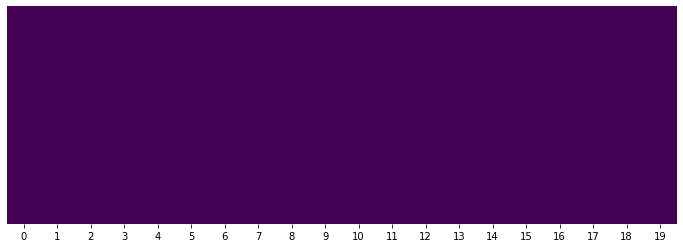

In [85]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)

<p style="font-size:18px">It looks good. The table no longer has any special characters or something similar.</p>

<h3>Explorativ analysis.</h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D20AEAD310>,
      dtype=object)

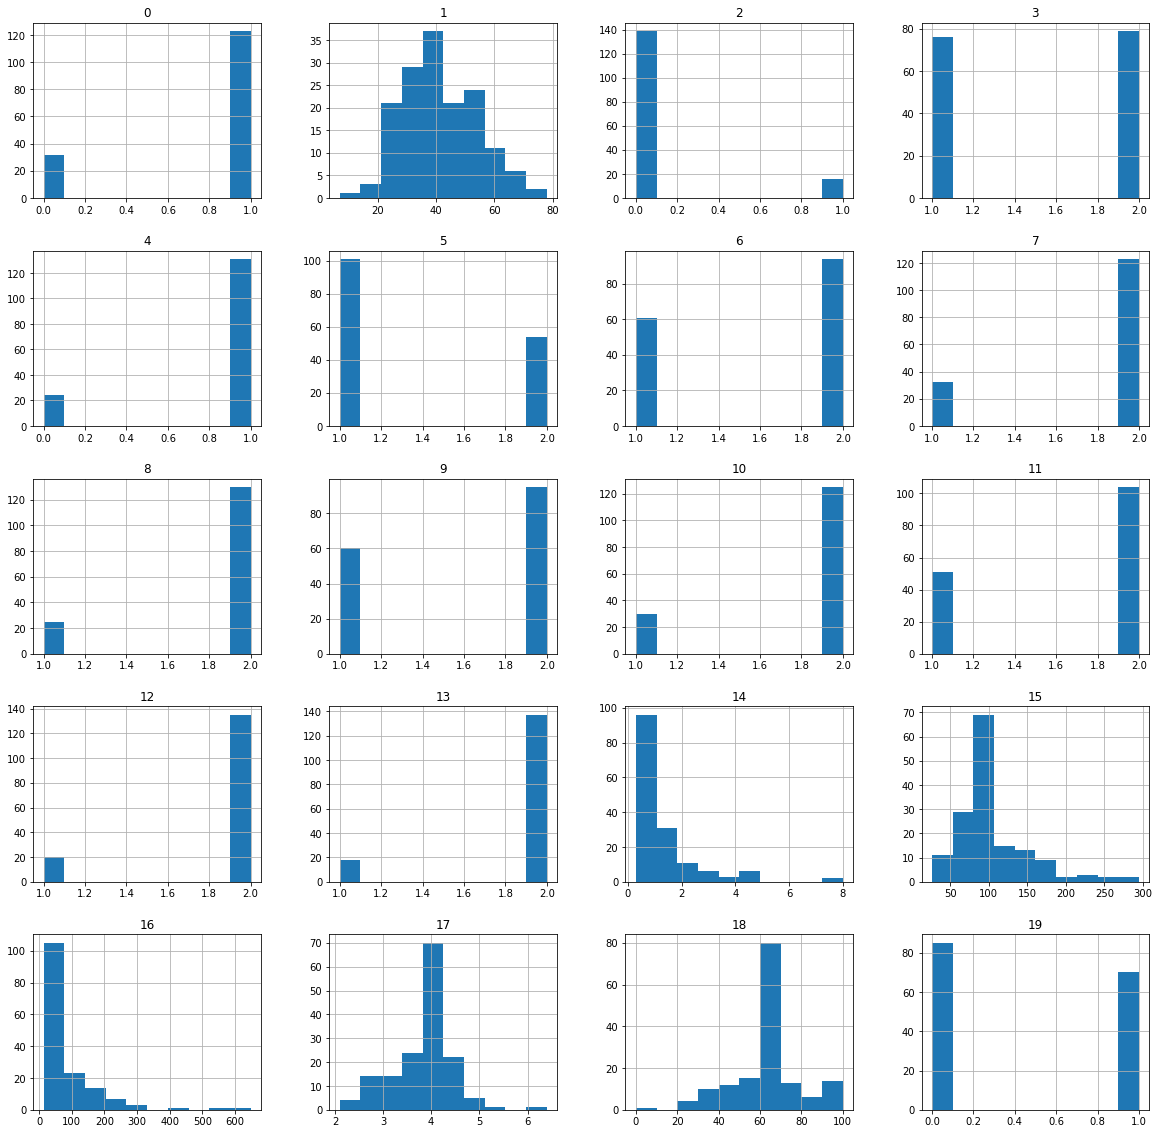

In [86]:
data.hist(figsize=(20,20))

<h3>Outliers</h3>
<p style="font-size:18px"> There is outliers in columns 14, 17,18. I am going to remove them.</p>

In [87]:
data[data[14]>6]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
131,0,31,0,1,1,1,1,1,2,2,1,2,2,2,8.0,85,101,2.2,61,1
150,0,46,0,2,1,1,1,1,2,2,2,1,1,1,7.6,85,242,3.3,50,1


In [88]:
data[14][131]=5

<ipython-input-88-81a1432de3e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[14][131]=5


In [89]:
data[14][150]=5

<ipython-input-89-d40b5e2fdfc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[14][150]=5


In [90]:
data[data[17]>5.5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
105,1,25,0,2,1,2,2,2,2,2,2,2,2,2,0.6,85,34,6.4,61,1


In [91]:
data[17][105]=5.5

<ipython-input-91-dcb736b00a89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[17][105]=5.5


In [92]:
data[data[18]<20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
130,1,54,0,2,1,2,2,2,2,2,2,2,2,2,1.0,85,30,4.5,0,1


In [93]:
data[18][130]=20

<ipython-input-93-e5dcd9cc7955>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[18][130]=20


<p style="font-size:18px">Histogramm after cleaning of outliers</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D20C4D6520>,
      dtype=object)

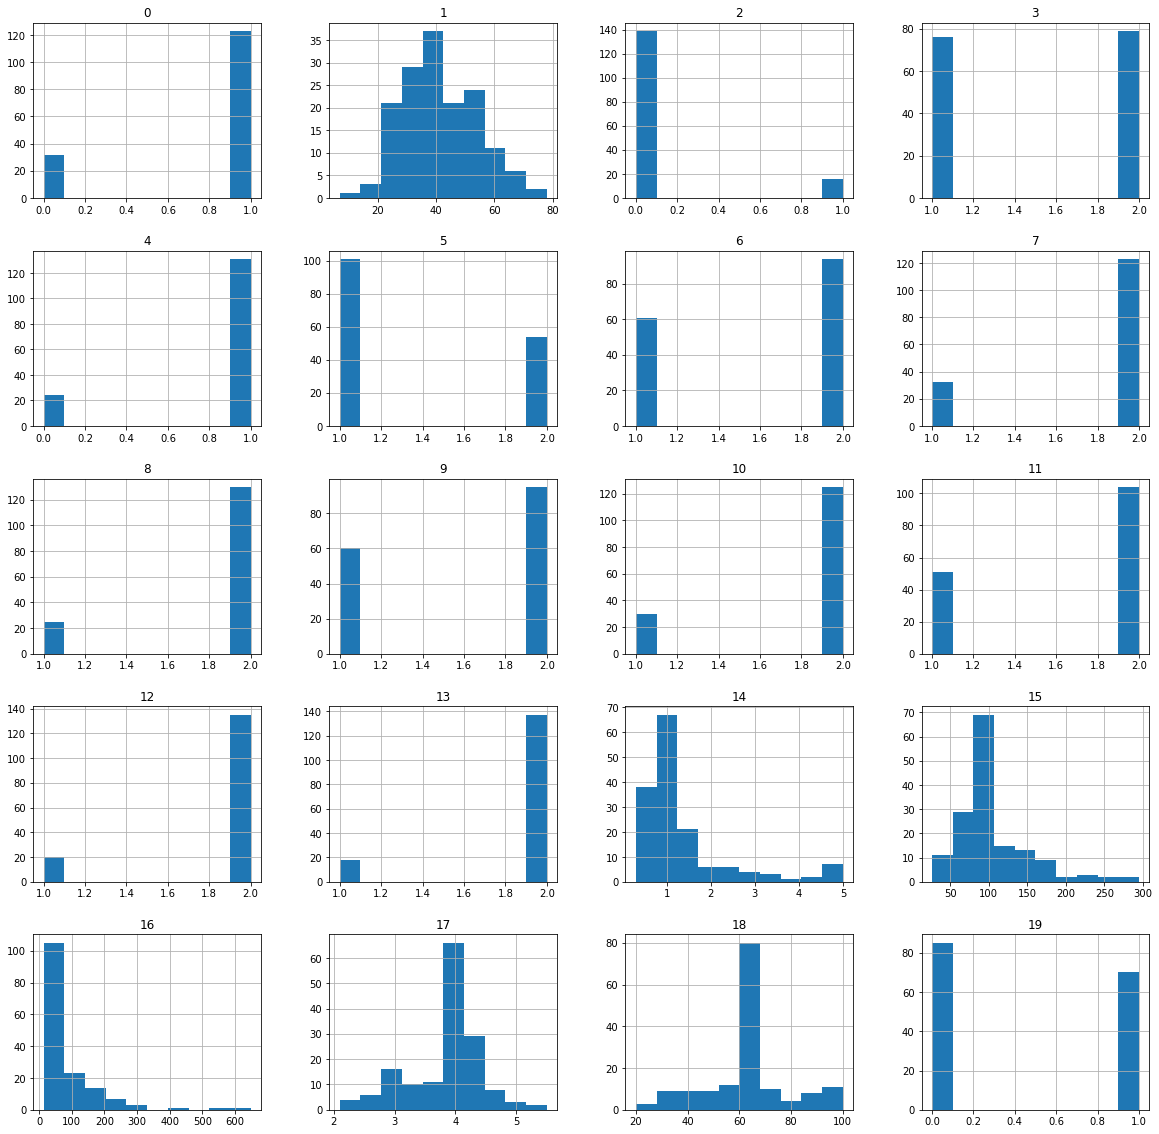

In [94]:
data.hist(figsize=(20,20))

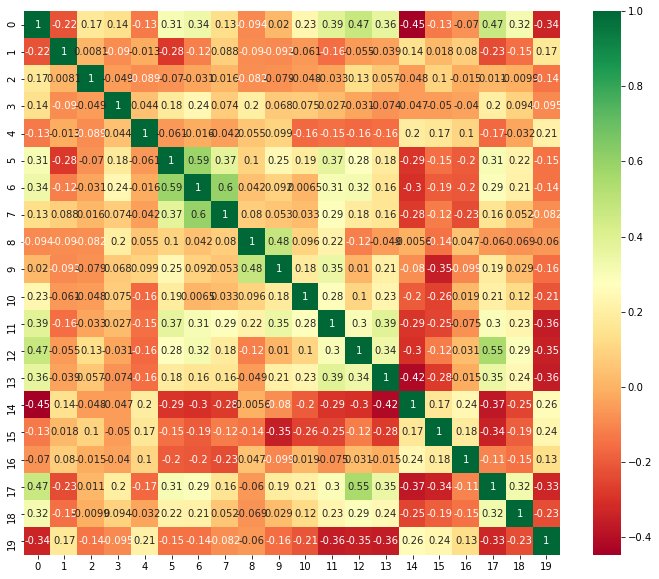

In [95]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

<p style="font-size:18px">The columns 5, 6, 7 and 9 shows correlation.</p>

In [96]:
data[1].unique()

array([30, 50, 78, 31, 34, 51, 23, 39, 32, 41, 47, 38, 66, 40, 22, 27, 42,
       25, 49, 58, 61, 62, 26, 35, 37, 20, 65, 52, 33, 56, 28, 36, 44, 64,
       45, 57, 24, 67, 59, 60, 48, 54,  7, 69, 72, 70, 46, 53, 43],
      dtype=int64)

In [97]:
data[0].unique()

array([1, 0], dtype=int64)

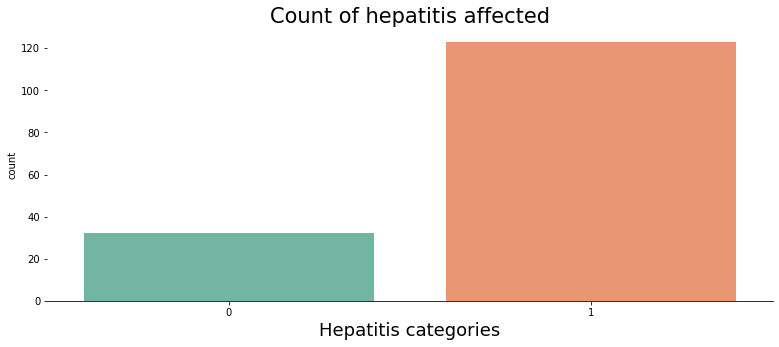

In [98]:
ax=sns.countplot(data=data, x=0, palette="Set2")
ax.set_title("Count of hepatitis affected", fontsize=21)
ax.set_xlabel("Hepatitis categories", fontsize=18)
fig=plt.gcf()
fig.set_size_inches(13,5)
sns.despine(left=True)

In [99]:
data[data[0]==1].count() # count of live

0     123
1     123
2     123
3     123
4     123
5     123
6     123
7     123
8     123
9     123
10    123
11    123
12    123
13    123
14    123
15    123
16    123
17    123
18    123
19    123
dtype: int64

In [100]:
data[data[0]==0].count()  # count of died Patients

0     32
1     32
2     32
3     32
4     32
5     32
6     32
7     32
8     32
9     32
10    32
11    32
12    32
13    32
14    32
15    32
16    32
17    32
18    32
19    32
dtype: int64

In [101]:
bins = [0,16,32,48,64,200]
labels = ['0-16', '16-32', '32-48', '48-64', '64+']
data['agegroup']=pd.cut(data[1], bins, labels = labels)

In [102]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,agegroup
0,1,30,1,1,1,2,2,2,1,2,...,2,2,2,1.0,85,18,4.0,61,0,16-32
1,1,50,0,1,1,1,2,2,1,2,...,2,2,2,0.9,135,42,3.5,61,0,48-64
2,1,78,0,2,1,1,2,2,2,2,...,2,2,2,0.7,96,32,4.0,61,0,64+
3,1,31,0,2,0,2,2,2,2,2,...,2,2,2,0.7,46,52,4.0,80,0,16-32
4,1,34,0,2,1,2,2,2,2,2,...,2,2,2,1.0,85,200,4.0,61,0,32-48


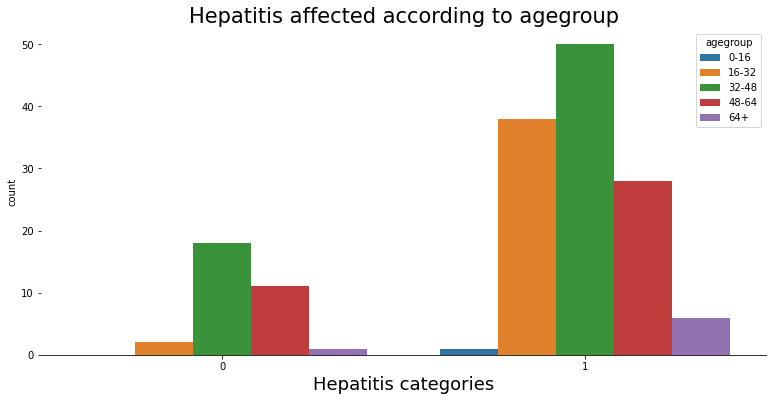

In [103]:
ax=sns.countplot(data=data, x=0, hue = "agegroup")
ax.set_title("Hepatitis affected according to agegroup", fontsize=21)
ax.set_xlabel("Hepatitis categories", fontsize=18)
fig=plt.gcf()
fig.set_size_inches(13,6)
sns.despine(left=True)

<p style="font-size:18px">Here we see that in both categories (live or died) most of those affected by hepatitis are aged 32-48.<br>
Of the group of those who have recovered, there are more people in age category 16-32.<br> 
Most people died who were between the ages of 32 and 64.</p>

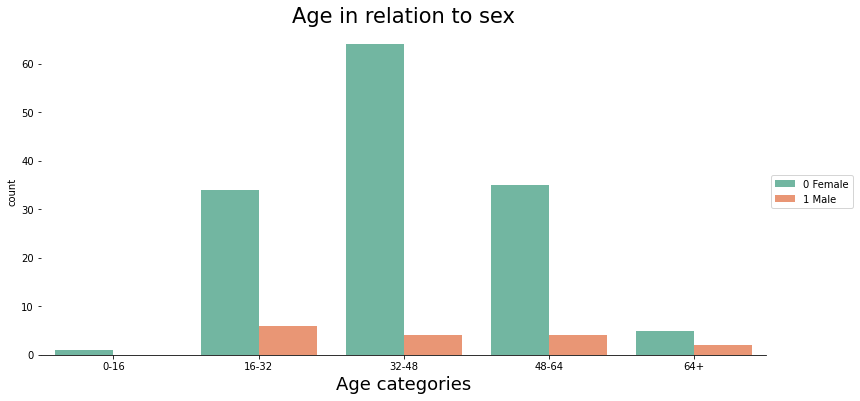

In [104]:
ax=sns.countplot(data=data, x="agegroup", hue = 2, palette="Set2")
ax.set_title("Age in relation to sex", fontsize=21)
plt.legend(['0 Female', '1 Male'],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel("Age categories", fontsize=18)
fig=plt.gcf()
fig.set_size_inches(13,6)
sns.despine(left=True)

<p style="font-size:18px">Women are more often diagnosed with hepatitis than men. The reason could be that women generally visit the doctor more often than men as a preventive measure. Possibly this influences the fact that the infection is more often discovered in women.</p>

<h2>Standard Scaler</h2>

In [105]:
data_1=data.drop("agegroup", axis=1)

In [106]:
data_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,30,1,1,1,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,0
1,1,50,0,1,1,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,0
2,1,78,0,2,1,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,0
3,1,31,0,2,0,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,0
4,1,34,0,2,1,2,2,2,2,2,2,2,2,2,1.0,85,200,4.0,61,0


In [107]:
scaler = StandardScaler()

In [108]:
# rescaling features
features = data_1[[1,14,15,16,17,18]]
for feature in features:
    data_1[feature] = scaler.fit_transform(pd.DataFrame(data_1[feature]))

In [109]:
data_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,-0.894192,1,1,1,2,2,2,1,2,2,2,2,2,-0.366253,-0.352069,-0.760716,0.284206,-0.036590,0
1,1,0.702579,0,1,1,1,2,2,1,2,2,2,2,2,-0.463963,0.713349,-0.488927,-0.553284,-0.036590,0
2,1,2.938059,0,2,1,1,2,2,2,2,2,2,2,2,-0.659382,-0.117677,-0.602173,0.284206,-0.036590,0
3,1,-0.814353,0,2,0,2,2,2,2,2,2,2,2,2,-0.659382,-1.183096,-0.375682,0.284206,1.097692,0
4,1,-0.574838,0,2,1,2,2,2,2,2,2,2,2,2,-0.366253,-0.352069,1.300348,0.284206,-0.036590,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,0.383225,0,2,1,1,1,1,2,2,2,1,1,1,3.542130,-0.352069,1.775979,-0.888280,-0.693279,1
151,1,0.223548,0,2,1,1,2,2,2,1,2,2,2,2,-0.463963,0.521574,0.643526,0.786700,-0.036590,1
152,1,1.580803,0,1,1,1,1,2,1,1,2,1,2,2,-0.561673,-0.565153,-0.738067,0.451704,-0.036590,1
153,1,0.942095,1,1,1,1,2,2,2,2,1,1,2,1,0.122295,-0.437303,-0.749392,0.451704,-0.812677,1


In [110]:
# knn object
knn = KNeighborsClassifier()

In [111]:
# create variable
X = data_1.drop([0], axis=1)
y = data_1[0]

In [112]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=4)

In [113]:
#Training the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [114]:
#Predict testing set
knn_predictions = knn.predict(X_test)

In [115]:
print(accuracy_score(y_test, knn_predictions)) #Check performance using accuracy

0.8723404255319149


In [116]:
print(roc_auc_score(y_test, knn_predictions))  # #Check performance using roc

0.6892857142857143


<p style="font-size:18px">The accuracy score with Standard Scaler  is 87%; ROC - 69%</p>

<h2>Robust Scaler</h2>

In [117]:
data_rc=data.drop("agegroup", axis=1)

In [118]:
data_rc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,30,1,1,1,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,0
1,1,50,0,1,1,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,0
2,1,78,0,2,1,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,0
3,1,31,0,2,0,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,0
4,1,34,0,2,1,2,2,2,2,2,2,2,2,2,1.0,85,200,4.0,61,0


In [119]:
rc = RobustScaler()

In [120]:
#Rescaling features
features = data_rc[[1,14,15,16,17,18]]
for feature in features:
    data_rc[feature] = rc.fit_transform(pd.DataFrame(data_rc[feature]))

In [121]:
data_rc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,-0.500000,1,1,1,2,2,2,1,2,2,2,2,2,0.000000,0.000000,-0.601504,0.000000,0.000,0
1,1,0.611111,0,1,1,1,2,2,1,2,2,2,2,2,-0.142857,1.204819,-0.240602,-0.714286,0.000,0
2,1,2.166667,0,2,1,1,2,2,2,2,2,2,2,2,-0.428571,0.265060,-0.390977,0.000000,0.000,0
3,1,-0.444444,0,2,0,2,2,2,2,2,2,2,2,2,-0.428571,-0.939759,-0.090226,0.000000,2.375,0
4,1,-0.277778,0,2,1,2,2,2,2,2,2,2,2,2,0.000000,0.000000,2.135338,0.000000,0.000,0


In [122]:
# create Variable
X = data_rc.drop([0], axis=1)
y = data_rc[0]

In [123]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=4)

In [124]:
#Training the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [125]:
#Predict testing set
knn_predictions = knn.predict(X_test)

In [126]:
print(accuracy_score(y_test, knn_predictions))

0.8723404255319149


In [127]:
print(roc_auc_score(y_test, knn_predictions))

0.6892857142857143


<p style="font-size:18px">With Robust Scaler the performance of modell have the same result of accuracy 87% and ROC results are slightly lower - 69%.</p> 

<h3>Modelling - MinMax Scaler.</h3>

In [128]:
data_mm = data.drop("agegroup", axis=1)

In [129]:
data_mm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,30,1,1,1,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,0
1,1,50,0,1,1,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,0
2,1,78,0,2,1,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,0
3,1,31,0,2,0,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,0
4,1,34,0,2,1,2,2,2,2,2,2,2,2,2,1.0,85,200,4.0,61,0


In [130]:
mm = MinMaxScaler()

In [131]:
#Rescaling features
features = data_mm[[1,14,15,16,17,18]]
for feature in features:
    data_mm[feature] = mm.fit_transform(pd.DataFrame(data_mm[feature]))

In [132]:
data_mm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,0.323944,1,1,1,2,2,2,1,2,2,2,2,2,0.148936,0.219331,0.006309,0.558824,0.5125,0
1,1,0.605634,0,1,1,1,2,2,1,2,2,2,2,2,0.127660,0.405204,0.044164,0.411765,0.5125,0
2,1,1.000000,0,2,1,1,2,2,2,2,2,2,2,2,0.085106,0.260223,0.028391,0.558824,0.5125,0
3,1,0.338028,0,2,0,2,2,2,2,2,2,2,2,2,0.085106,0.074349,0.059937,0.558824,0.7500,0
4,1,0.380282,0,2,1,2,2,2,2,2,2,2,2,2,0.148936,0.219331,0.293375,0.558824,0.5125,0


In [133]:
X = data_mm.drop([0], axis=1)
y = data_mm[0]

In [148]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=4)

In [149]:
#Training the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [150]:
#Predict testing set
knn_predictions = knn.predict(X_test)

In [151]:
print(accuracy_score(y_test, knn_predictions))

0.8723404255319149


In [152]:
print(roc_auc_score(y_test, knn_predictions))

0.7482142857142856


<p style="font-size:18px">With Min Max Scaler the performance of modell 87% of accuracy and ROC 75% is higher!</p>

<h3>Hyperparameter Tuning</h3>

In [153]:
#List Hyperparameters
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [154]:
#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [155]:
#Making model
clf = GridSearchCV(knn, hyperparameters, cv=10)
best_model = clf.fit(X_train,y_train)

In [156]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 20


In [157]:
#Predict testing set
y_predictions = best_model.predict(X_test)

In [158]:
#Check performance using accuracy
print(accuracy_score(y_test, y_predictions))

0.8936170212765957


In [159]:
#Check performance using ROC
roc_auc_score(y_test, y_predictions)

0.7017857142857142

<p style="font-size:18px">Hyperparameter tuning shows 89% accuracy but only 70% for ROC Curve.</p>

<h3>Conclusion:</h3>
<p style="font-size:18px">The best results were achieved with the MinMax Scaler with out Hyperparamether tuning. Here the accuracy is the same as with the other two scalers, but the sensitivity limit of the ROC curve reaches the highest value 75%.</p>